In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

Solve the radiative transfer, the Schwarzschild, equation:
$$ dI_\nu = (-I_\nu + B_\nu(T)) n\sigma_\nu dz $$
This has the analytical solution:
$$ I_\nu(z) = I_\nu(z_0) e^{-\mu} + \int_{\mu_0}^\mu d\mu'\,e^{-(\mu-\mu')}\, B_\nu(\mu')$$
where $$\mu(z)\equiv \int_{z_0}^z dz' n\sigma_\nu(z') dz'$$

If we take a simple expression for absorbtion rate based on the density descrease, $n\sigma=\kappa e^{-z/H}$, then
$$ \mu(z) = \kappa H \left( 1- e^{-z/H}\right)$$

In [2]:
#Some constants and simple functions
hbar=1.0546e-34 #J -s
c=3.e8 #m/w
kb=1.38e-23 #J/K
h=2*3.14159*hbar
def bnu(nu,T):
    b=(2*np.pi*h*nu**3/c**2)/(np.exp(h*nu/(kb*T))-1.)
    return b
    

/var/folders/yt/44r1mdln1k7_0595qvt97vd00000gn/T/ipykernel_54373/4266385238.py:7: RuntimeWarning: overflow encountered in exp
  b=(2*np.pi*h*nu**3/c**2)/(np.exp(h*nu/(kb*T))-1.)


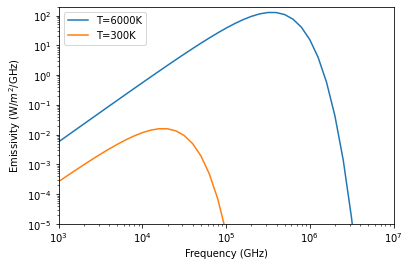

In [3]:
nulog = np.arange(6.,16,.1)
nu=10.**nulog
T=6000.
barr=bnu(nu,T) # E-s/s^3  s^2/m^2 = W/m^2//Hz
plt.plot(nu/1.e9,barr*1.e9,label='T=6000K')
T=300.
barr=bnu(nu,T) # E-s/s^3  s^2/m^2 = W/m^2//Hz
plt.plot(nu/1.e9,barr*1.e9,label='T=300K')
plt.xscale('log')
plt.xlabel('Frequency (GHz)')
plt.ylabel('Emissivity (W/$m^2$/GHz)')
plt.yscale('log')
plt.axis([1000,1.e7,1.e-5,200])
plt.legend()

In [4]:
rsolar=6.955e8
lsolar=3.85e26
rorbit=1.5e11
rearth=6.37e6
T=6000.
print(lsolar/(4*3.14*rsolar**2))
print(lsolar/(4*3.14*rorbit**2))
print(kb*T/h/1.e9)

63368995.28609401
1362.3496107572541
124957.71305730598


In [5]:
def bnuT(nu):
    return bnu(nu,T)
T=5800.
ans=integrate.quad(bnuT,1.e12,1.e15)
print(ans)

(61882533.77209493, 3.514951480754711e-05)


/var/folders/yt/44r1mdln1k7_0595qvt97vd00000gn/T/ipykernel_54373/4266385238.py:7: RuntimeWarning: overflow encountered in exp
  b=(2*np.pi*h*nu**3/c**2)/(np.exp(h*nu/(kb*T))-1.)


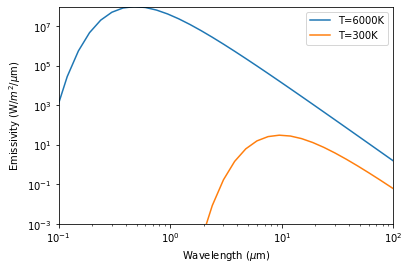

In [6]:
# To convert to W/m^2/wavelength, multiply by c
wavel =c/nu
# dP/d\lambda = dP/d\nu d\nu/d\lambda = dP/d\nu  c/\lambda^2 = dP/d\nu \nu^2/c
T=6000.
barr=bnu(nu,T) # E-s/s^3  s^2/m^2 = W/m^2//Hz
plt.plot(wavel*1.e6,barr*nu**2/c/1.e6,label='T=6000K')
T=300.
barr=bnu(nu,T) # E-s/s^3  s^2/m^2 = W/m^2//Hz
plt.plot(wavel*1.e6,barr*nu**2/c/1.e6,label='T=300K')
plt.xscale('log')
plt.xlabel('Wavelength ($\mu$m)')
plt.ylabel('Emissivity (W/$m^2$/$\mu$m)')
plt.yscale('log')
plt.axis([.1,100,1.e-3,1.e8])
plt.legend()

In [7]:
def bnuT(nu):
    return bnu(nu,T)
T=5800.
numax=c/.3e-6 # wavelngths shorter than this are absorbed by high latitude atmosphere
ans=integrate.quad(bnuT,1.e12,numax)
# Radiance on Earth should be
# L_\odot*/4\pi*R_orbit**2
# = ans*R_\odot**2*/R_orbit**2
print(ans[0]*4*3.14*rsolar**2,ans[0]*(rsolar/rorbit)**2,(rearth/rorbit)**2)


3.759689639183023e+26 1330.39265363872 1.8034177777777776e-09


In [8]:
#Estimate for mean free path:
ppm=400.e-6
mco2=(12+2*16)*1.67e-27
ang=1.e-10
rco2=2*ang
rhoco2=ppm*1# kg/m^3, 
nco2=rhoco2/mco2
sigma=rco2**2
print(nco2*sigma)

217.74632553075665


In [25]:
km=1.e3
micron=1.e-6
lapse=6.5 #K/km
H = 8.5 #km
def Temp(z):
    Temp=Tground-lapse*z
    if Temp < 220.: Temp=220.
    return Temp
def didz(y,z,updown):
    T=Temp(z)
    didz=updown*(-y+bnu(nu,T))*kappa*np.exp(-z/H) # updown=-1 if integrating downwards
    if z<0.: didz =0.
    print(z,y,didz)
    return didz

In [26]:
y0=1366. # This is the total intensity integrated over all frequency.
# B_nu has dimensions of W/m^2 per Hz
# Divide by the typical frequency band
bandwidth=1.e14
y0=y0/bandwidth
wavel=5.*micron
nu=c/wavel
Tground=288.
t=np.arange(200.,0.1,-.1) # 1 cm^{-1} = 1 (10^{-5} km)^{-1} = 10^5 km^{-1} in km
updown = -1
kappa=.1*km#*np.exp(200./H) # 
inu=integrate.odeint(didz, y0, t,args=(updown,),rtol=1.e10, atol=1.e-10) # for down

200.0 [1.366e-11] [8.24335015e-20]
199.9 [1.366e-11] [8.34090345e-20]
199.9 [1.366e-11] [8.34090345e-20]
199.8 [1.366e-11] [8.43961122e-20]
199.8 [1.366e-11] [8.43961122e-20]
-800.1999999999432 [1.36549802e-11] 0.0
-800.1999999999432 [1.36599578e-11] 0.0


(1.0, 200.0, 0.001, 10000.0)

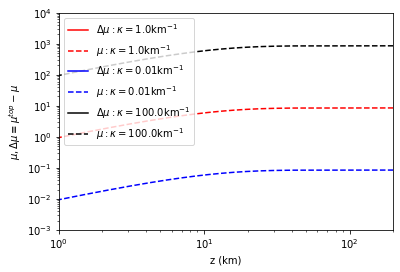

In [27]:
### mu
kappa=1. #/km
mu=kappa*H*(1.-np.exp(-t/H))
plt.plot(t,-mu+mu[-1],'-r',label='$\\Delta\\mu: \\kappa=$'+str(kappa)+'km$^{-1}$')
plt.plot(t,mu,'--r',label='$\\mu: \\kappa=$'+str(kappa)+'km$^{-1}$')
kappa=.01 #/km
mu=kappa*H*(1.-np.exp(-t/H))
plt.plot(t,-mu+mu[-1],'-b',label='$\\Delta\\mu: \\kappa=$'+str(kappa)+'km$^{-1}$')
plt.plot(t,mu,'--b',label='$\\mu: \\kappa=$'+str(kappa)+'km$^{-1}$')
kappa=100. #/km
mu=kappa*H*(1.-np.exp(-t/H))
plt.plot(t,-mu+mu[-1],'-k',label='$\\Delta\\mu: \\kappa=$'+str(kappa)+'km$^{-1}$')
plt.plot(t,mu,'--k',label='$\\mu: \\kappa=$'+str(kappa)+'km$^{-1}$')
plt.legend()
plt.xlabel('z (km)')
plt.ylabel('$\\mu,\\Delta\mu\equiv\\mu^{top}-\\mu$')
plt.yscale('log')
plt.xscale('log')
plt.axis([1.,200,1.e-3,10000])

/var/folders/yt/44r1mdln1k7_0595qvt97vd00000gn/T/ipykernel_54373/4266385238.py:7: RuntimeWarning: divide by zero encountered in double_scalars
  b=(2*np.pi*h*nu**3/c**2)/(np.exp(h*nu/(kb*T))-1.)


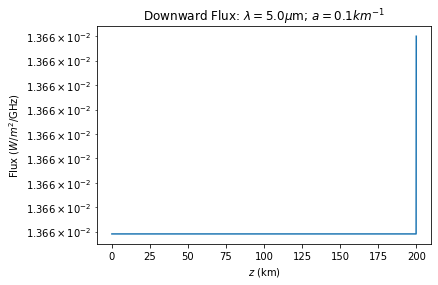

In [23]:
plt.plot(t,inu*1.e9)
plt.yscale('log')
#plt.xscale('log')

plt.title('Downward Flux: $\\lambda=$'+str(wavel/1.e-6)+'$\\mu$m; $a=$'+str(kappa/km)+'$km^{-1}$')
plt.xlabel('$z$ (km)')
plt.ylabel('Flux ($W/m^2$/GHz)')
earth_radiation=bnu(Tground,nu)*1.e9
plt.plot([.1,200],[earth_radiation,earth_radiation])
#plt.axis([5,20,1.e-345,1.e-5])


In [41]:
## Upward flux
z0=.1
t=np.arange(z0,200.,.1) # 1 cm^{-1} = 1 (10^{-5} km)^{-1} = 10^5 km^{-1} in km
kappa=.1*km # per km
lapse=6.5 #K/km
wavel=15.*micron
nu=c/wavel
y0=bnu(nu,Temp(z0))
updown=1
inuup1=integrate.odeint(didz, y0, t,args=(updown,),rtol=1.e-11, atol=1.e-15)
kappa=.001*km # per km
inuup2=integrate.odeint(didz, y0, t,args=(updown,),rtol=1.e-11, atol=1.e-15)
kappa=.0001*km # per km
inuup3=integrate.odeint(didz, y0, t,args=(updown,),rtol=1.e-11, atol=1.e-15)


0.1 [1.35680714e-11] [0.]
0.10000063245553203 [1.35680714e-11] [-6.64638209e-17]
0.10000063245553203 [1.35680714e-11] [-6.64596665e-17]
0.10000126491106406 [1.35680714e-11] [-1.32919322e-16]
0.10000126491106406 [1.35680714e-11] [-1.32915168e-16]
0.10632582023140082 [1.35659691e-11] [-4.5657982e-13]
0.10632582023140082 [1.35666272e-11] [-5.21571304e-13]
0.11265037555173757 [1.3561474e-11] [-6.7607547e-13]
0.11265037555173757 [1.35626344e-11] [-7.90582598e-13]
0.11897493087207432 [1.35564215e-11] [-8.40122359e-13]
0.11897493087207432 [1.35571155e-11] [-9.08560681e-13]
0.12479730890396622 [1.35512929e-11] [-9.43769095e-13]
0.12479730890396622 [1.35515066e-11] [-9.6482638e-13]
0.13061968693585813 [1.35456639e-11] [-9.97865323e-13]
0.13061968693585813 [1.35457316e-11] [-1.00452396e-12]
0.13644206496775002 [1.35397479e-11] [-1.02351128e-12]
0.13644206496775002 [1.35398082e-11] [-1.02944442e-12]
0.14227710946220123 [1.35337112e-11] [-1.03845078e-12]
0.14227710946220123 [1.35337578e-11] [-1.04

0.013568071435929474 0.009941406474216886 10.461538461538462


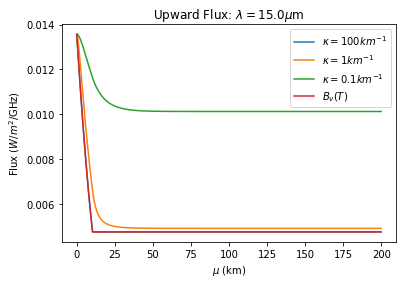

In [42]:
lapse=6.5
trop = (Tground-220)/lapse
T=np.zeros(np.size(t))
for i,z in enumerate(t):
    T[i]=Temp(z)
mu=kappa*H*(1.-np.exp(-t/H))
plt.plot(t,inuup1*1.e9,label='$\\kappa=100km^{-1}$')
plt.plot(t,inuup2*1.e9,label='$\\kappa=1km^{-1}$')
plt.plot(t,inuup3*1.e9,label='$\\kappa=0.1km^{-1}$')
plt.plot(t,bnu(nu,T)*1.e9,label='$B_\\nu(T)$')
earth_radiation=bnu(nu,220)*1.e9
#plt.plot([0,200],[earth_radiation,earth_radiation])
#plt.yscale('log')
#plt.xscale('log')
plt.title('Upward Flux: $\\lambda=$'+str(wavel/1.e-6)+'$\\mu$m')
plt.xlabel('$\\mu$ (km)')
plt.legend()
plt.ylabel('Flux ($W/m^2$/GHz)')
trop = (Tground-220)/lapse#220=tground-lapse*z
#plt.plot([trop,trop],[1.e-3,1])
print(y0*1.e9,mu[0],trop)
#plt.axis([9,11.5,.003,.006])

In [165]:
kappa=.00001*km # per km
lapse=6.5 #K/km
wavel=1.*micron
def Temp(z):
    Temp=Tground-lapse*z
    if Temp < 220.: Temp=220.
    return Temp
def didz(y,z):
    T=Temp(z)
    didz=(-y+bnu(nu,T))*kappa*np.exp(-z/H) # minus sign since we're integrating downwards
    #print(T,nu,bnu(nu,T))
    return didz
nu=c/wavel
y0=bnu(nu,Tground)
inuup00001=integrate.odeint(didz, y0, t)

4.575100688599269e-26


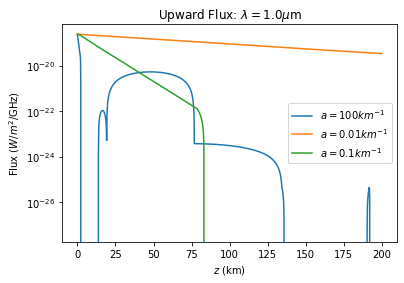

In [166]:
plt.plot(t,inuup1*1.e9,label='$a=100km^{-1}$')
plt.plot(t,inuup00001*1.e9,label='$a=0.01km^{-1}$')
plt.plot(t,inuup0001*1.e9,label='$a=0.1km^{-1}$')
plt.yscale('log')
plt.title('Upward Flux: $\\lambda=$'+str(wavel/1.e-6)+'$\\mu$m')
plt.xlabel('$z$ (km)')
plt.legend()
plt.ylabel('Flux ($W/m^2$/GHz)')
print(bnu(nu,220)*1.e9)